In [0]:
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import metrics
import numpy as np
from sklearn.metrics import *
from nltk.tokenize import TweetTokenizer


Using TensorFlow backend.


In [0]:
def TFIDF(X_train, X_test,MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)

In [0]:
def modelEvaluation(pred, test_labels):
    #Print model evaluation to predicted result 
    print("F1-Measure: ",metrics.f1_score(test_labels, pred, average='macro'), "\t||\tAccuracy: ", metrics.accuracy_score(test_labels, pred))
    print("\n---------------------------\n")
    print("\nConfusion Matrix: \n",metrics.confusion_matrix(test_labels, pred))
    # print("\nclassification_report: \n",metrics.classification_report(test_labels, np.argmax(pred, axis=1)))
    print("\n---------------------------\n")


In [0]:
def naive_bayes_classifier(train, test, train_target, test_target):
    mnb = MultinomialNB()
    mnb.fit(train, train_target)
    predictions = mnb.predict(test)
    modelEvaluation(predictions, test_target)

In [0]:
def svm_classifier(train, test, train_target, test_target):
    final = LinearSVC(C=0.5)
    final.fit(train, train_target)
    modelEvaluation(final.predict(test), test_target)
                                    
    return None

In [0]:
def nn_classifier(shape, nClasses):
    
    dropout=0.5
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    
    # hidden lyers
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    
    # output
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
data_train = fetch_20newsgroups(subset='train')
categories = (data_train.target_names)


data_train = fetch_20newsgroups(subset='train', categories=categories)
data_test = fetch_20newsgroups(subset='test', categories=categories)

train = data_train.data
train_labels = data_train.target
test = data_test.data
test_labels = data_test.target


group0 = [1, 2, 3, 4, 5]    # comp
group1 = [7, 8, 9, 10]      # rec
group2 = [11, 12, 13, 14]   # sci
group5 = [0, 15, 19]        # alt
group3 = [6]                # misc
group4 = [18, 17, 16]       # talk




In [0]:
def mergeCat(labels):
  for i,n in enumerate(labels):
    if n in group0: labels[i] = 0
    elif n in group1: labels[i] = 1
    elif n in group2: labels[i] = 2
    elif n in group3: labels[i] = 3
    elif n in group4: labels[i] = 4
    elif n in group5: labels[i] = 5
  return labels


In [0]:
y_train = mergeCat(data_train.target)
y_test = mergeCat(data_test.target)

In [0]:
X_train_tfidf,X_test_tfidf = TFIDF(data_train.data,data_test.data)

tf-idf with 75000 features


In [0]:
naive_bayes_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test)

F1-Measure:  0.7334698849801183 	||	Accuracy:  0.8518321826872013

---------------------------


Confusion Matrix: 
 [[1899   15   41    0    0    0]
 [  34 1529   26    0    1    0]
 [ 235   26 1312    0    4    2]
 [ 268   95   26    1    0    0]
 [  31   30  100    0  876   13]
 [  35   29   75    0   30  799]]

---------------------------



In [0]:
svm_classifier(X_train_tfidf, X_test_tfidf, y_train, y_test)

In [0]:
model_nn = nn_classifier(X_train_tfidf.shape[1], 6)
history = model_nn.fit(X_train_tfidf, y_train,
                              validation_split=0.25,
                              epochs=10,
                              shuffle=True,
                              batch_size=32,
                              verbose=2)
predicted = model_nn.predict(X_test_tfidf)
print("\nclassification_report: \n",metrics.classification_report(y_test, np.argmax(predicted, axis=1)))


Train on 8485 samples, validate on 2829 samples
Epoch 1/10
 - 9s - loss: 0.9018 - acc: 0.6166 - val_loss: 0.2544 - val_acc: 0.9275
Epoch 2/10
 - 7s - loss: 0.1570 - acc: 0.9538 - val_loss: 0.2059 - val_acc: 0.9456
Epoch 3/10
 - 7s - loss: 0.0579 - acc: 0.9836 - val_loss: 0.2087 - val_acc: 0.9502
Epoch 4/10
 - 7s - loss: 0.0311 - acc: 0.9926 - val_loss: 0.3164 - val_acc: 0.9297
Epoch 5/10
 - 7s - loss: 0.0297 - acc: 0.9938 - val_loss: 0.2382 - val_acc: 0.9502
Epoch 6/10
 - 7s - loss: 0.0276 - acc: 0.9960 - val_loss: 0.2409 - val_acc: 0.9480
Epoch 7/10
 - 7s - loss: 0.0182 - acc: 0.9972 - val_loss: 0.3481 - val_acc: 0.9427
Epoch 8/10
 - 7s - loss: 0.0187 - acc: 0.9974 - val_loss: 0.2569 - val_acc: 0.9502
Epoch 9/10
 - 7s - loss: 0.0155 - acc: 0.9981 - val_loss: 0.2536 - val_acc: 0.9512
Epoch 10/10
 - 7s - loss: 0.0160 - acc: 0.9973 - val_loss: 0.2923 - val_acc: 0.9449

classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0

In [0]:
from keras.utils import plot_model
plot_model(model_nn, to_file='model.png')

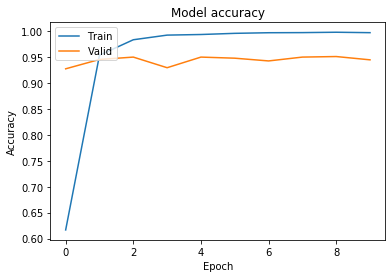

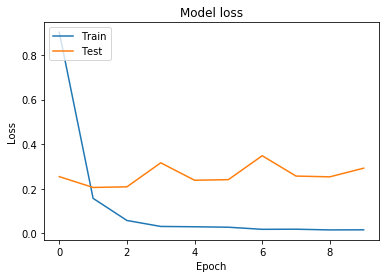

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()